# _How to Interpolate with Simulated Data with Scipy_

## Dr. Tirthajyoti Sarkar

---

![header](https://raw.githubusercontent.com/tirthajyoti/Optimization-Python/master/images/Simu-interpolate-Header.png)

https://github.com/tirthajyoti/Optimization-Python/blob/master/Simulation-interpolation.ipynb

In [1]:
from scipy.interpolate import interp1d
import numpy as np, matplotlib.pyplot as plt
from scipy import interpolate
import time

In [2]:
NUM_EXP = 11
NUM_INTERPOLATE = 101

In [3]:
def simple_simulation(x):
    time.sleep(0.01)
    y = np.cos(-x**2/9.0)+np.sin(x/6)
    return y

In [4]:
def complex_simulation(x):
    """
    A nonlinear simulation function with some time delay
    """
    time.sleep(0.1)
    y = np.cos(-x**2/9.0)+np.sin(x/6)
    return y

In [5]:
ip_experiment = np.linspace(0, 10, num=NUM_EXP, endpoint=True)
experiment_bounds = (0, 10)

In [6]:
def run_experiments(experiment_bounds, n=10):
    results = []
    low, high = experiment_bounds
    domain = np.linspace(low, high, num=n, endpoint=True)
    for i in domain:
        y = complex_simulation(i)
        results.append(y)
    return (domain, results)

In [7]:
def random_experiments(experiment_bounds, n=10):
    results = []
    low, high = experiment_bounds
    domain = np.random.uniform(low, high, size=11)
    for i in domain:
        y = complex_simulation(i)
        results.append(y)
    return domain, results

In [8]:
domain, results = run_experiments(experiment_bounds, n=11)
random_domain, random_results = random_experiments(experiment_bounds, n=11)

In [9]:
f3 = interp1d(domain, results, kind='cubic')
f3_random = interp1d(random_domain, random_results, kind='cubic')

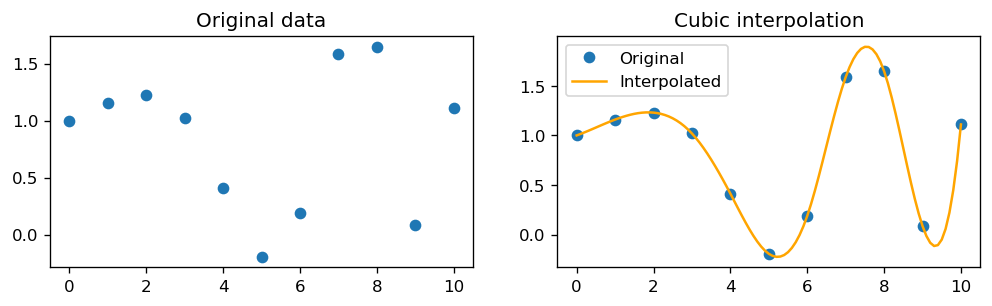

In [10]:
low, high = experiment_bounds
xnew = np.linspace(low, high, num=NUM_INTERPOLATE, endpoint=True)
fig, ax = plt.subplots(1, 2, figsize=(10, 2.5), dpi=120)

ax[0].scatter(domain, results)
ax[0].set_title("Original data")
ax[1].plot(domain, results, 'o')
ax[1].plot(xnew, f3(xnew), color='orange', linestyle='-')
ax[1].legend(['Original', 'Interpolated'])
ax[1].set_title("Cubic interpolation")
plt.show()

In [11]:
def optimum_simulation(experiment_bounds, n=11):
    """
    Using exhaustive simulations
    """
    domain, results = np.array(run_experiments(experiment_bounds, n=n))
    imax = np.argmax(results)
    return (domain[imax])

In [12]:
t1 = time.time()
optimum_simu = optimum_simulation(experiment_bounds)
t2 = time.time()
print(optimum_simu)
print("Time taken:", round(t2-t1), "seconds")

8.0
Time taken: 1 seconds


In [13]:
def optimum_interpolation(domain, init_results, n=101):
    """
    Using interpolation
    """
    low, high = domain.min(), domain.max()
    ip_interpolated = np.linspace(low, high, num=n, endpoint=True)
    f3 = interp1d(domain, init_results, kind='cubic')
    results_interpolated = np.array(f3(ip_interpolated))
    imax = np.argmax(results_interpolated)
    return (ip_interpolated[imax])

In [14]:
domain, init_results = np.array(run_experiments(experiment_bounds, n=NUM_EXP))
t1 = time.time()
optimum_interp = optimum_interpolation(domain, init_results)
t2 = time.time()
print(optimum_interp)
print("Time taken:", round(1000000*(t2-t1)), "microseconds")

7.5
Time taken: 1230 microseconds


In [15]:
domain, init_results = np.array(random_experiments(experiment_bounds, n=NUM_EXP))
t1 = time.time()
optimum_interp = optimum_interpolation(domain, init_results)
t2 = time.time()
print(optimum_interp)
print("Time taken:", round(1000000*(t2-t1)), "microseconds")

7.795482082447593
Time taken: 1116 microseconds


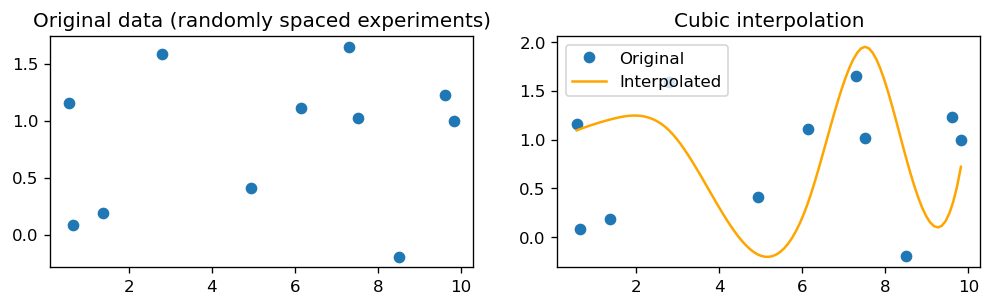

In [16]:
domain, init_results = np.array(random_experiments(experiment_bounds, n=NUM_EXP))
fig, ax = plt.subplots(1, 2, figsize=(10, 2.5), dpi=120)
low, high = domain.min(), domain.max()
xnew = np.linspace(low, high, num=NUM_INTERPOLATE, endpoint=True)
f3 = interp1d(domain, init_results, kind='cubic')
ax[0].scatter(domain, results)
ax[0].set_title("Original data (randomly spaced experiments)")
ax[1].plot(domain, results, 'o')
ax[1].plot(xnew, f3(xnew), color='orange', linestyle='-')
ax[1].legend(['Original', 'Interpolated'])
ax[1].set_title("Cubic interpolation")
plt.show()

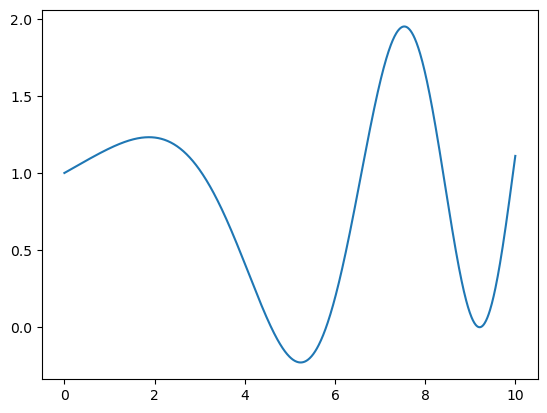

In [17]:
x = np.linspace(0, 10, num=1001, endpoint=True)
y = np.cos(-x**2/9.0)+np.sin(x/6)

plt.plot(x, y)
plt.show()

In [18]:
x[np.argmax(y)]

7.54